In [67]:
# import required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import datasets
from sklearn.cluster import KMeans, MiniBatchKMeans, AgglomerativeClustering, DBSCAN, MeanShift

from sklearn.preprocessing import StandardScaler

In [2]:
# load the data

data = pd.read_csv("iris.csv")
data.drop("Id", axis=1, inplace=True)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [4]:
mapings = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}
mapings

{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

In [5]:
# replace the independent variable

data['Species']= data['Species'].map(mapings)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
# Importing data from sklearn.datasets

iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df['Species'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
# seems data is equally distributed
data['Species'].value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

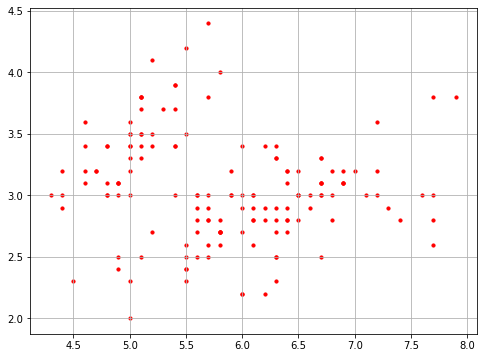

In [8]:
# plot the data for visualization

plt.figure(figsize=(8,6))
plt.scatter(data['SepalLengthCm'].values,data['SepalWidthCm'].values,c='Red',s=10)
plt.grid()
plt.show()

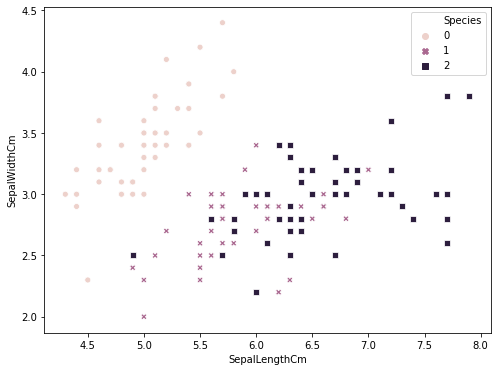

In [9]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = 'SepalLengthCm', y = 'SepalWidthCm', hue = 'Species', data = data, style="Species" )
plt.show()

In [72]:
# Divide the data in X and Y

# for distance based algorithms data should on equal scale. It works better when all the data is in equal scale.

scalar = StandardScaler()
X = scalar.fit_transform(data.iloc[:,:-1])

Y = data.iloc[:,-1]

In [74]:
X[:]

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

### KMeans Clustering

In [75]:
# As per the data we can see that there are 3 clusters.
# So using n_clusters = 3 for testing the cluster visulization

cluster = KMeans(n_clusters = 3, n_jobs=-1)
model = cluster.fit(X)

In [76]:
# cluster centers

model.cluster_centers_

array([[-1.01457897,  0.84230679, -1.30487835, -1.25512862],
       [-0.05021989, -0.88029181,  0.34753171,  0.28206327],
       [ 1.13597027,  0.09659843,  0.996271  ,  1.01717187]])

In [77]:
# number of clusters

model.n_clusters

3

In [78]:
# Here we can see the cluters in which our data is classified by our model
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [79]:
# new observation

new_observation = [[1.2, 0.3, 0.8, 1.1]]
model.predict(new_observation)

array([2])

In [80]:
labels = model.labels_
centroids = model.cluster_centers_

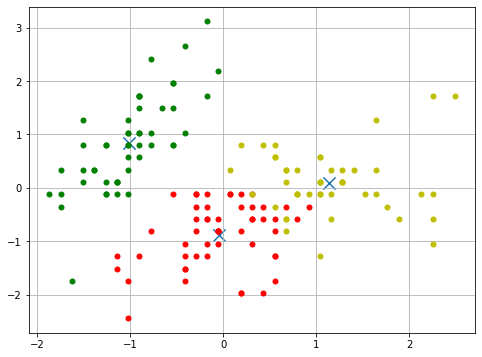

In [108]:
colors = ['g.','r.','y.','c.','b.']
X_axis = 0
Y_axis = 1

plt.figure(figsize=(8,6))
for i in range(data.shape[0]):
    #plt.plot(data.iloc[i,X_axis], data.iloc[i,Y_axis], colors[labels[i]], markersize = 10)
    plt.plot(X[i,X_axis], X[i,Y_axis], colors[labels[i]], markersize = 10)

plt.scatter(centroids[:,X_axis], centroids[:,Y_axis], marker = 'x', linewidths = 5, s = 150)
plt.grid()
plt.show()

In [82]:
# The above cluters were formed by seeing the output i.e. dependent variable

# Below visualization will be based on the only the data we have as the independent variables

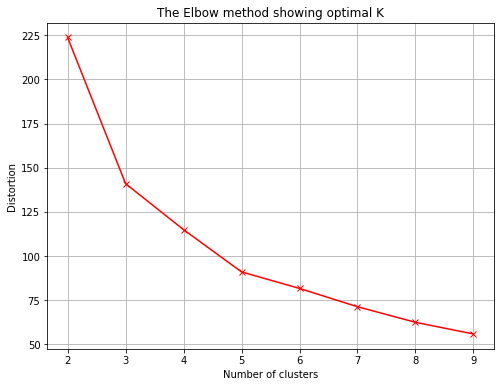

In [83]:
# Elbow methos is used in order to determine the no. of clusters

distortion = []
k = range(2,10)
for i in k:
    model = KMeans(n_clusters = i, init = 'k-means++', n_init = 10, max_iter = 300, n_jobs = -1)
    model.fit(X)
    distortion.append(model.inertia_)

plt.figure(figsize=(8,6))
plt.plot(k,distortion, 'rx-')
plt.grid()
plt.xlabel("Number of clusters")
plt.ylabel("Distortion")
plt.title('The Elbow method showing optimal K')
plt.show()

In [84]:
# In the above graph we can see that there is sudden drop where k = 3 and then the distortion is stable.
# so using graph we can concluse that no. of cluster should be either 2 or 3.

# above we have already fitted the Kmeans for your data.
# Now we will use some other techniques for clustering

### MiniBatch KMeans Clustering

In [85]:
# MiniBatch KMeans
# The minibatch KMeans is used when the dataset is too large. Here we will create batches of the data in order to create clusters
# Kmeans uses all the data in one go for clustering and the cost will increase when we wil have large datasets.
# So we can use Mini Batch Kmeans for clustering in order to reduce cost and time.
# In miniBatch KMeans we need to specify the clusters and no of batch size

In [119]:
cluster_m = MiniBatchKMeans(n_clusters = 3, max_iter = 100, batch_size = 75)
model_minibatch = cluster_m.fit(X)

In [120]:
labels_m = model_minibatch.labels_
centroids_m = model_minibatch.cluster_centers_

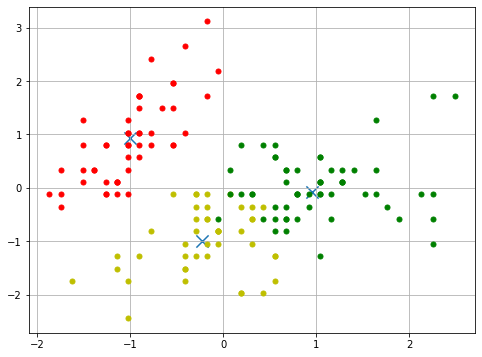

In [121]:
colors = ['g.','r.','y.','c.','b.']
X_axis = 0
Y_axis = 1

plt.figure(figsize=(8,6))
for i in range(data.shape[0]):
    #plt.plot(data.iloc[i,X_axis], data.iloc[i,Y_axis], colors[labels_m[i]], markersize = 10)
    plt.plot(X[i,X_axis], X[i,Y_axis], colors[labels_m[i]], markersize = 10)

plt.scatter(centroids_m[:,X_axis], centroids_m[:,Y_axis], marker = 'x', linewidths = 5, s = 150)
plt.grid()
plt.show()

### MeanShift Clustering

In [89]:
### MeanShift will create the cluster by its own. We don't need to specify the clusters.
### there is parameter include_all, if we set it to True it will cluter all the data.
# and if we set it False ourliers will be skipped.

In [90]:
cluster_ms = MeanShift(cluster_all = True, n_jobs = -1)
model_meanshift = cluster_ms.fit(X)

In [91]:
labels_ms = model_meanshift.labels_
centroids_ms = model_meanshift.cluster_centers_

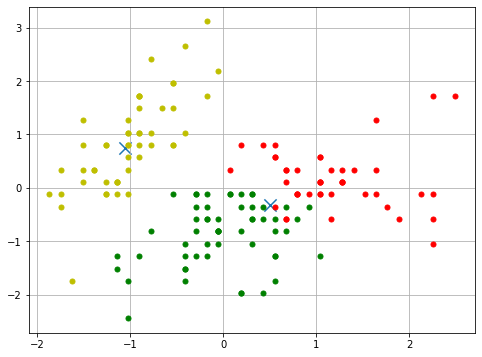

In [110]:
colors = ['g.','r.','y.','c.','b.']
X_axis = 0
Y_axis = 1

plt.figure(figsize=(8,6))
for i in range(data.shape[0]):
    #plt.plot(data.iloc[i,X_axis], data.iloc[i,Y_axis], colors[labels_ms[i]], markersize = 10)
    plt.plot(X[i,X_axis], X[i,Y_axis], colors[labels_m[i]], markersize = 10)
    

plt.scatter(centroids_ms[:,X_axis], centroids_ms[:,Y_axis], marker = 'x', linewidths = 5, s = 150)
plt.grid()
plt.show()

In [93]:
### MeanShift has created the 2 clusters using its internal calculations

### DBSCAN Clustering

In [94]:
cluster_db = DBSCAN(eps = 1.5, min_samples= 3,  n_jobs = -1)
model_db = cluster_db.fit(X)

In [95]:
labels_db = model_db.labels_

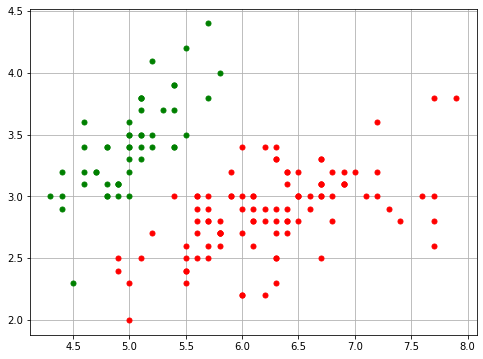

In [96]:
colors = ['g.','r.','y.','c.','b.']
X_axis = 0
Y_axis = 1

plt.figure(figsize=(8,6))
for i in range(data.shape[0]):
    plt.plot(data.iloc[i,X_axis], data.iloc[i,Y_axis], colors[labels_db[i]], markersize = 10)
plt.grid()
plt.show()

### AgglomerativeClustering- Hierarchical Clustering

In [111]:
# As we have seen using graph of elbow method, 2 clusters can be formed. we will set parameter of hierarchical as 3

cluster_h = AgglomerativeClustering(n_clusters = 2, affinity='euclidean', linkage='average')
model_h = cluster_h.fit(X)

In [112]:
labels_h = model_h.labels_

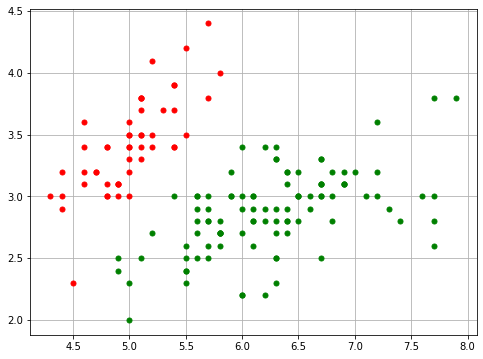

In [113]:
colors = ['g.','r.','y.','c.','b.']
X_axis = 0
Y_axis = 1

plt.figure(figsize=(8,6))
for i in range(data.shape[0]):
    plt.plot(data.iloc[i,X_axis], data.iloc[i,Y_axis], colors[labels_h[i]], markersize = 10)
plt.grid()
plt.show()

In [100]:
from sklearn.metrics import silhouette_score

In [101]:
# The silhouette_score is used to to get the score of how well our data is clustered
# Value = 1 : Clusters are will seperated/formed
# Value = 0 : Cluster boundaries are confusing
# Value = Negative : Clusters are wrongly created. I.e. Values are assigned to the wrong clusters.

In [118]:
print(f"Silhouette score of Kmeans : {silhouette_score(X,model.labels_)}")
print(f"Silhouette score of Mini Batch Kmeans : {silhouette_score(X,model_minibatch.labels_)}")
print(f"Silhouette score of MeanShift : {silhouette_score(X,model_meanshift.labels_)}")
print(f"Silhouette score of DBSCAN : {silhouette_score(X,model_db.labels_)}")
print(f"Silhouette score of Hierarchical : {silhouette_score(X,model_h.labels_)}")

Silhouette score of Kmeans : 0.3413029820476799
Silhouette score of Mini Batch Kmeans : 0.580184463257396
Silhouette score of MeanShift : 0.580184463257396
Silhouette score of DBSCAN : 0.580184463257396
Silhouette score of Hierarchical : 0.580184463257396


In [103]:
# When labels are available we can use below methods
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

In [105]:
adjusted_rand_score(Y, model.labels_)
normalized_mutual_info_score(Y, model_minibatch.labels_)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


0.6426598653411438

In [106]:
print(f"Adjusted Rand score of Kmeans : {adjusted_rand_score(Y, model.labels_)}")
print(f"Adjusted Rand score of Mini Batch Kmeans : {adjusted_rand_score(Y, model_minibatch.labels_)}")
print(f"Adjusted Rand score of MeanShift : {adjusted_rand_score(Y, model_meanshift.labels_)}")
print(f"Adjusted Rand score of DBSCAN : {adjusted_rand_score(Y, model_db.labels_)}")
print(f"Adjusted Rand score of Hierarchical : {adjusted_rand_score(Y, model_h.labels_)}")

Adjusted Rand score of Kmeans : 0.3428784093070229
Adjusted Rand score of Mini Batch Kmeans : 0.5923326221845838
Adjusted Rand score of MeanShift : 0.5681159420289855
Adjusted Rand score of DBSCAN : 0.5681159420289855
Adjusted Rand score of Hierarchical : 0.5621364251426576


In [107]:
print(f"Normalize mutual info score of Kmeans : {normalized_mutual_info_score(Y, model.labels_)}")
print(f"Normalize mutual info score of Mini Batch Kmeans : {normalized_mutual_info_score(Y, model_minibatch.labels_)}")
print(f"Normalize mutual info score of MeanShift : {normalized_mutual_info_score(Y, model_meanshift.labels_)}")
print(f"Normalize mutual info score of DBSCAN : {normalized_mutual_info_score(Y, model_db.labels_)}")
print(f"Normalize mutual info score of Hierarchical : {normalized_mutual_info_score(Y, model_h.labels_)}")

Normalize mutual info score of Kmeans : 0.6188769677956393
Normalize mutual info score of Mini Batch Kmeans : 0.6426598653411438
Normalize mutual info score of MeanShift : 0.7611702597222872
Normalize mutual info score of DBSCAN : 0.7611702597222872
Normalize mutual info score of Hierarchical : 0.7284149776595633


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use avera

In [122]:
# Conclusion:
# we can assign 2 or 3 clusters to our data.
# there several methods defined above in order to classfiy the clusters and test the same.